### In-Class Assignment: Web Scraping and Data Extraction from a New Webpage
Use the requests library to fetch a new webpage.
Parse the HTML content using BeautifulSoup.
Extract various elements such as figures, tables, and text.
Work collaboratively in groups to practice web scraping and present their findings.
- Task 1: Select a Webpage of interest (e.g., a news article, an educational resource, or a data-driven website). Ensure that the selected webpage contains a variety of elements, such as tables, figures, and text content.
- Task 2: Fetch and Parse the Webpage

In [45]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/Politics_of_Liechtenstein'
response = requests.get(url)

In [47]:

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print("Failed to fetch the webpage.")

Successfully fetched the webpage!


In [49]:

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

### Task 3: Extract Elements

In [67]:
#Find all images and extract their src attributes.
images = soup.find_all('img')
image_urls = [img['src'] for img in images if 'src' in img.attrs]
print(image_urls[1])

/static/images/mobile/copyright/wikipedia-wordmark-en.svg


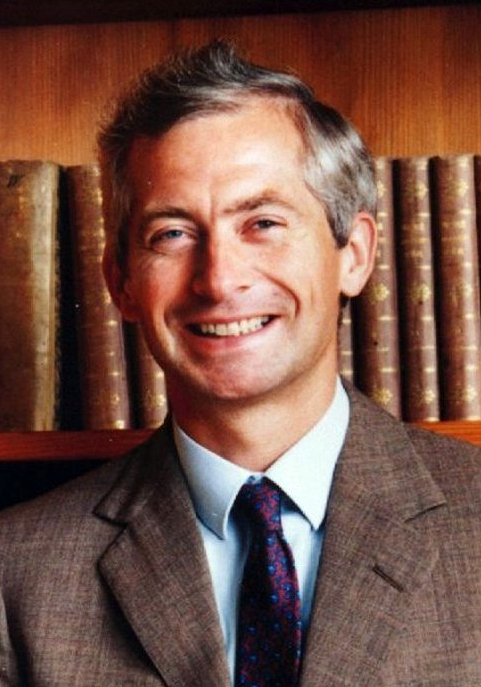

In [63]:
from PIL import Image
import requests

im = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/c/c7/F%C3%BCrst_Hans-Adam_II._von_und_zu_Liechtenstein_%28cropped%29.jpg', stream=True).raw)
im

In [65]:
# Locate and extract all tables on the webpage, converting them into Pandas DataFrames.
import pandas as pd

tables = soup.find_all('table')
for i, table in enumerate(tables):
    df = pd.read_html(str(table))[0]
    print(f"Table {i+1}:\n", df.head(), "\n")
print(tables)

Table 1:
                            Politics of Liechtenstein
0                     Constitution 1921 Constitution
1  Monarchy Prince (list) Hans-Adam II Hereditary...
2   Executive Prime Minister Daniel Risch Government
3        Legislative Landtag President: Albert Frick
4  Elections Recent elections General:20132017202... 

Table 2:
            Office          Name            Party             Since
0          Prince  Hans-Adam II              NaN  13 November 1989
1   Prince-regent         Alois              NaN    15 August 2004
2  Prime Minister  Daniel Risch  Patriotic Union     25 March 2021 

Table 3:
   Party                      Party.1  Votes      % Seats  +/–
0   NaN              Patriotic Union  72361  35.89    10   +2
1   NaN  Progressive Citizens' Party  72319  35.87    10   +1
2   NaN                    Free List  25943  12.87     3    0
3   NaN  Democrats for Liechtenstein  22456  11.14     2  New
4   NaN             The Independents   8556   4.24     0   –5 

Table 

C:\Users\afdet\AppData\Local\Temp\ipykernel_21200\946576521.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\afdet\AppData\Local\Temp\ipykernel_21200\946576521.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\afdet\AppData\Local\Temp\ipykernel_21200\946576521.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\afdet\AppData\Local\Temp\ipykernel_21200\946576521.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a lit

In [71]:
df=pd.read_html(url, match='Office')
print(df)

[           Office          Name            Party             Since
0          Prince  Hans-Adam II              NaN  13 November 1989
1   Prince-regent         Alois              NaN    15 August 2004
2  Prime Minister  Daniel Risch  Patriotic Union     25 March 2021]


In [75]:
#Extract the main text content, such as paragraphs or headings.
paragraphs = soup.find_all('p')
text_content = ' '.join([para.get_text() for para in paragraphs])
print(text_content[:500])  # Print the first 500 characters


 Liechtenstein is a principality governed under a semi-constitutional monarchy. It has a form of mixed constitution in which political power is shared by the monarch and a democratically elected parliament. There is a two-party system (though there are two minor parties as well) and a form of representative democracy in which the prime minister and head of government is responsible to parliament. However the Prince of Liechtenstein is head of state and exercises considerable political powers.
 


### Task 4: Analyze and Discuss Findings
Each group will analyze the extracted data and discuss the following:
- What figures (images) were extracted and what do they represent?
- What information is contained in the tables, and how does it contribute to the overall content of the webpage?
- What is the main focus of the text content extracted? How does it relate to the images and tables?
- Discuss the challenges faced during extraction, such as dealing with complex HTML structures or incomplete data.

1. We extracted the image of the prince of Liechtenstein - head of state.
2. Primary offices and who holds them since when
3. How the politics of Liechtenstein work
4. Figuring out how to print the image

### Task 5: Present Findings
Shares your analysis of the extracted elements.
Discusses any patterns, relationships, or insights gained from the data.

Each group should submit their Jupyter notebook (or Python script) with the code, analysis, and any additional notes or reflections on the exercise.